In [63]:
import os
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report

from utils import stopwords

In [64]:
df = pd.read_csv("data_extended.csv")
n = (len(df["Label"]))
x = []
y = []
for i in range(0, n):
    x.append(df["Comment"][i])
    y.append(df["Label"][i])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25,
                                                                    random_state=0)


In [65]:
vocab = {}
for i in range(len(x_train)):
    word_list = []
    for word in x_train[i].split():
        new_word = word.strip(string.punctuation).lower()
        if (len(new_word) > 2) and (new_word not in stopwords):
            if new_word in vocab:
                vocab[new_word] += 1
            else:
                vocab[new_word] = 1


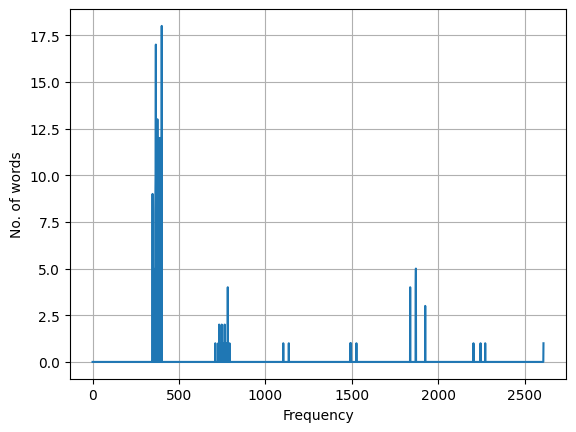

In [73]:
num_words = [0 for i in range(max(vocab.values()) + 1)]
freq = [i for i in range(max(vocab.values()) + 1)]
for key in vocab:
    num_words[vocab[key]] += 1
plt.plot(freq, num_words)
# plt.axis((1, 10, 0, 100))
plt.xlabel("Frequency")
plt.ylabel("No. of words")
plt.grid()
plt.show()

In [74]:
cutoff_freq = 1
features = []
for key in vocab:
    if vocab[key] >= cutoff_freq:
        features.append(key)

print(features)

['documents', 'required', 'renewing', 'driving', 'license', 'online', 'process', 'available', 'kindly', 'let', 'know', 'update', 'regarding', 'like', 'express', 'gratitude', 'healthcare', 'workers', 'government', 'hospitals', 'providing', 'excellent', 'medical', 'services', 'citizens', 'thank', 'continued', 'efforts', 'improving', 'country', 'public', 'transport', 'highly', 'unreliable', 'buses', 'run', 'time', 'frequency', 'low', 'making', 'daily', 'commuting', 'huge', 'problem', 'urgent', 'attention', 'appreciate', 'looked', 'soon', 'possible', 'tell', 'register', 'new', 'business', 'msme', 'scheme', 'need', 'guidance', 'passport', 'application', 'extremely', 'efficient', 'user-friendly', 'received', 'hassle', 'satisfied', 'water', 'supply', 'area', 'irregular', 'days', 'comes', 'quality', 'poor', 'resolve', 'issue', 'earliest', 'truly', 'recent', 'initiative', 'plant', 'trees', 'urban', 'areas', 'significantly', 'improved', 'greenery', 'neighborhood', 'improve', 'waste', 'management

In [75]:
x_train_dataset = np.zeros((len(x_train), len(features)))
for i in range(len(x_train)):
    word_list = [word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1

In [76]:
x_test_dataset = np.zeros((len(x_test), len(features)))
for i in range(len(x_test)):
    word_list = [word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1


In [77]:
from sklearn.naive_bayes import MultinomialNB

# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(x_train_dataset, y_train)
Y_test_pred = clf.predict(x_test_dataset)
sklearn_score_train = clf.score(x_train_dataset, y_train)
print("Sklearn's score on training data :", sklearn_score_train)
sklearn_score_test = clf.score(x_test_dataset, y_test)
print("Sklearn's score on testing data :", sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred))

Sklearn's score on training data : 1.0
Sklearn's score on testing data : 0.2304
Classification report for testing data :-
              precision    recall  f1-score   support

   Complaint       0.23      1.00      0.37       576
  Compliment       0.00      0.00      0.00       663
     Inquiry       0.00      0.00      0.00       631
  Suggestion       0.00      0.00      0.00       630

    accuracy                           0.23      2500
   macro avg       0.06      0.25      0.09      2500
weighted avg       0.05      0.23      0.09      2500



D:\miniProjects\MPR-Sem-6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\miniProjects\MPR-Sem-6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\miniProjects\MPR-Sem-6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
for i in range(0, len(y_test), 10):
    print("[", Y_test_pred[i], y_test[i], "]")

[ Complaint Suggestion ]
[ Complaint Inquiry ]
[ Complaint Compliment ]
[ Complaint Compliment ]
[ Complaint Complaint ]
[ Complaint Inquiry ]
[ Complaint Suggestion ]
[ Complaint Compliment ]
[ Complaint Inquiry ]
[ Complaint Inquiry ]
[ Complaint Suggestion ]
[ Complaint Inquiry ]
[ Complaint Inquiry ]
[ Complaint Complaint ]
[ Complaint Complaint ]
[ Complaint Compliment ]
[ Complaint Compliment ]
[ Complaint Complaint ]
[ Complaint Inquiry ]
[ Complaint Suggestion ]
[ Complaint Suggestion ]
[ Complaint Inquiry ]
[ Complaint Inquiry ]
[ Complaint Suggestion ]
[ Complaint Complaint ]
[ Complaint Suggestion ]
[ Complaint Complaint ]
[ Complaint Inquiry ]
[ Complaint Inquiry ]
[ Complaint Compliment ]
[ Complaint Compliment ]
[ Complaint Compliment ]
[ Complaint Inquiry ]
[ Complaint Compliment ]
[ Complaint Inquiry ]
[ Complaint Inquiry ]
[ Complaint Complaint ]
[ Complaint Complaint ]
[ Complaint Inquiry ]
[ Complaint Inquiry ]
[ Complaint Compliment ]
[ Complaint Suggestion ]
[ Comp

In [79]:
import random

print(classification_report(y_test, [
    random.choice(['Complaint', 'Inquiry', 'Suggestion', 'Compliment']) for _ in y_test]))

              precision    recall  f1-score   support

   Complaint       0.23      0.25      0.24       576
  Compliment       0.26      0.25      0.25       663
     Inquiry       0.26      0.26      0.26       631
  Suggestion       0.23      0.22      0.22       630

    accuracy                           0.25      2500
   macro avg       0.25      0.25      0.25      2500
weighted avg       0.25      0.25      0.25      2500

